In [17]:
import pandas as pd

# Load CSV files
historical_data = pd.read_csv('lu-average-monthly-temperatures.csv')
peak_hour_data = pd.read_csv('lu-average-monthly-temperatures_2023 GLA data store updates.csv')

In [18]:
# Standardize column names (assuming they are already standard)
historical_data.columns = historical_data.columns.str.replace('-', '_')
peak_hour_data.columns = peak_hour_data.columns.str.replace('-', '_')

# Define month mapping
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply mapping to convert month names to numbers
historical_data['Month_Num'] = historical_data['Month'].map(month_mapping)
peak_hour_data['Month_Num'] = peak_hour_data['Month'].map(month_mapping)


In [19]:
historical_data.head()

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub_surface_lines,Month_Num
0,2013,January,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9,1
1,2013,February,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3,2
2,2013,March,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4,3
3,2013,April,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3,4
4,2013,May,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3,5


In [20]:
peak_hour_data.head()

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub_surface_lines,Month_Num
0,2023,January,22.88,23.36,18.59,22.72,20.50,26.00,17.34,13.45,1
1,2023,February,22.98,23.39,19.05,22.71,20.59,25.92,17.68,14.74,2
2,2023,March,23.11,23.12,18.61,22.36,20.56,25.38,17.71,14.68,3
3,2023,April,24.09,24.46,20.35,23.71,21.91,26.48,18.69,16.84,4
4,2023,May,25.73,26.65,21.87,25.18,23.86,28.22,20.42,20.41,5


In [21]:
# Calculate descriptive statistics
historical_stats = historical_data.describe()
peak_hour_data_stats = peak_hour_data.describe()

print("Historical Data Statistics:\n", historical_stats)
print("\nRecent Data Statistics:\n", peak_hour_data)


Historical Data Statistics:
               Year   Bakerloo    Central    Jubilee   Northern  Piccadilly  \
count    96.000000  96.000000  96.000000  96.000000  96.000000   96.000000   
mean   2016.500000  26.973958  26.040521  22.426354  24.596146   23.319688   
std       2.303316   2.683934   2.931759   2.737872   2.444210    2.754154   
min    2013.000000  21.500000  20.900000  16.400000  19.500000   18.700000   
25%    2014.750000  24.940000  23.415000  20.307500  22.717500   21.072500   
50%    2016.500000  26.750000  25.495000  22.030000  24.270000   22.665000   
75%    2018.250000  29.315000  28.640000  24.807500  26.642500   25.942500   
max    2020.000000  32.410000  32.020000  28.160000  29.460000   28.570000   

        Victoria  Waterloo_and_City  Sub_surface_lines  Month_Num  
count  96.000000          96.000000          96.000000  96.000000  
mean   24.668229          21.637917          18.690000   6.500000  
std     3.061781           2.687738           4.514007   3.47017

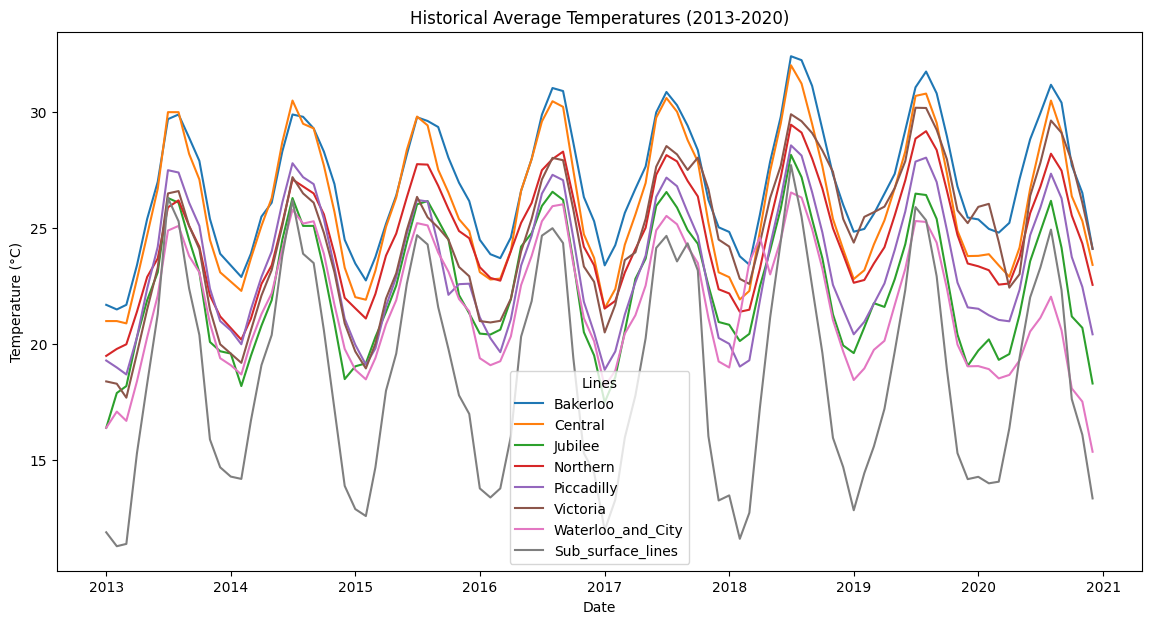

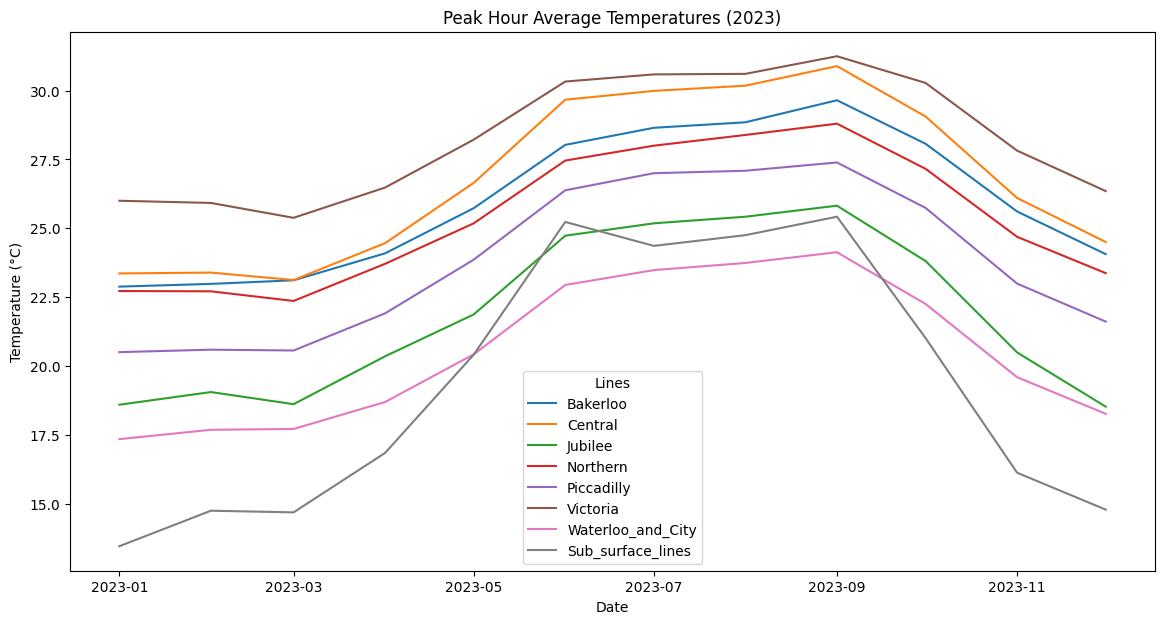

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Year' and 'Month' columns to datetime format for easier plotting
historical_data['Date'] = pd.to_datetime(historical_data['Year'].astype(str) + '-' + historical_data['Month'] + '-01')
peak_hour_data['Date'] = pd.to_datetime(peak_hour_data['Year'].astype(str) + '-' + peak_hour_data['Month'] + '-01')

# Plot average temperatures over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=historical_data.melt(id_vars=['Date'], value_vars=['Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']),
             x='Date', y='value', hue='variable')
plt.title('Historical Average Temperatures (2013-2020)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Lines')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=peak_hour_data.melt(id_vars=['Date'], value_vars=['Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']),
             x='Date', y='value', hue='variable')
plt.title('Peak Hour Average Temperatures (2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(title='Lines')
plt.show()


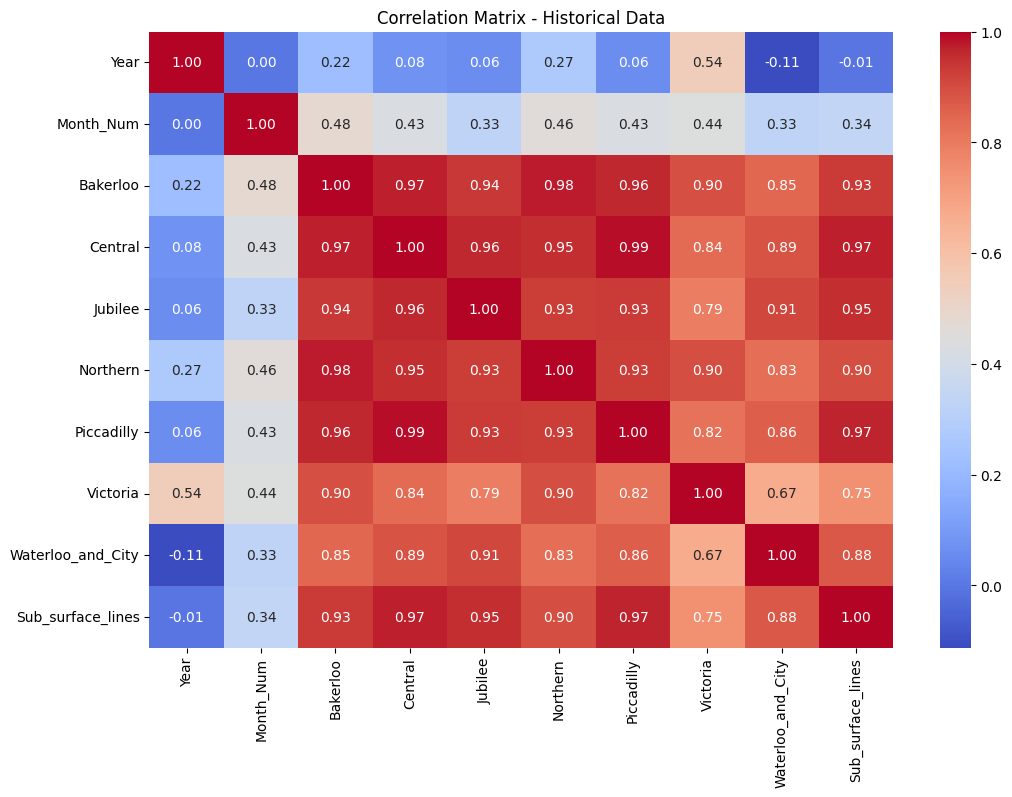

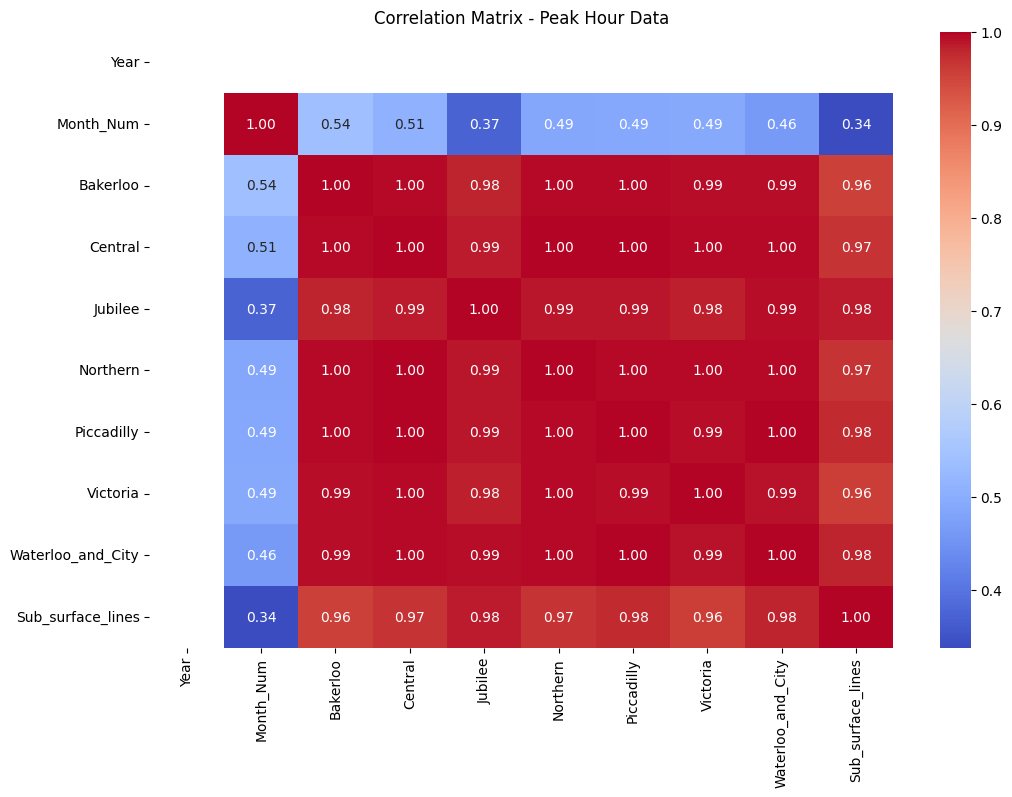

In [23]:
# Correlation matrix for historical data (with months converted to numbers)
historical_corr = historical_data[['Year', 'Month_Num', 'Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(historical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Historical Data')
plt.show()

# Correlation matrix for peak hour data (with months converted to numbers)
peak_hour_corr = peak_hour_data[['Year', 'Month_Num', 'Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(peak_hour_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Peak Hour Data')
plt.show()



In [24]:
from sklearn.ensemble import IsolationForest

# Combine historical and peak hour data for anomaly detection
combined_df = pd.concat([historical_data[['Year', 'Month_Num', 'Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']],
                         peak_hour_data[['Year', 'Month_Num', 'Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']]], keys=['Historical', 'Peak Hour'])

# Prepare data for Isolation Forest
X = combined_df[['Year', 'Month_Num', 'Bakerloo', 'Central', 'Jubilee', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo_and_City', 'Sub_surface_lines']].fillna(0)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # 5% contamination
outliers = iso_forest.fit_predict(X)

# Add anomaly labels to the dataframe
combined_df['Anomaly'] = outliers

# Display anomalies
anomalies = combined_df[combined_df['Anomaly'] == -1]
print(anomalies)


               Year  Month_Num  Bakerloo  Central  Jubilee  Northern  \
Historical 0   2013          1     21.70    21.00    16.40     19.50   
           1   2013          2     21.50    21.00    17.90     19.80   
           2   2013          3     21.70    20.90    18.20     20.00   
           13  2014          2     22.90    22.30    18.20     20.20   
           48  2017          1     23.40    21.55    17.50     21.54   
           66  2018          7     32.41    32.02    28.16     29.46   
           67  2018          8     32.24    31.23    27.20     29.12   
           95  2020         12     24.11    23.42    18.31     22.56   
Peak Hour  5   2023          6     28.03    29.67    24.73     27.46   
           8   2023          9     29.65    30.89    25.82     28.80   
           9   2023         10     28.07    29.06    23.81     27.16   

               Piccadilly  Victoria  Waterloo_and_City  Sub_surface_lines  \
Historical 0        19.30     18.40              16.40    

In [27]:
historical_data.head()

,Year,Month,Bakerloo,Central,Jubilee,Northern,Piccadilly,Victoria,Waterloo_and_City,Sub_surface_lines,Month_Num,Date
0,2013,January,21.7,21.0,16.4,19.5,19.3,18.4,16.4,11.9,1,2013-01-01
1,2013,February,21.5,21.0,17.9,19.8,19.0,18.3,17.1,11.3,2,2013-02-01
2,2013,March,21.7,20.9,18.2,20.0,18.7,17.7,16.7,11.4,3,2013-03-01
3,2013,April,23.4,22.8,20.3,21.4,20.3,19.6,18.4,15.3,4,2013-04-01
4,2013,May,25.4,24.7,21.9,22.9,22.4,21.5,20.3,18.3,5,2013-05-01


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# Prepare data for regression
X = historical_data[['Year', 'Month_Num']].apply(pd.to_numeric, errors='coerce')
y = historical_data['Bakerloo']

# Train-test split (use the historical data for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions for 2024
months = np.arange(1, 13)  # Numeric representation of months (1 to 12)
year = 2024
future_data = pd.DataFrame({'Year': [year]*12, 'Month_Num': months})

# Predict temperatures
future_predictions = reg.predict(future_data)
future_data['Predicted_Temperature'] = future_predictions

print("Predictions for 2024:")
print(future_data)

# Evaluate model using Mean Squared Error (MSE)
# First, get predictions on the test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE) of the Regression Model: {mse:.2f}")


Predictions for 2024:
    Year  Month_Num  Predicted_Temperature
0   2024          1              26.060604
1   2024          2              26.408303
2   2024          3              26.756003
3   2024          4              27.103703
4   2024          5              27.451403
5   2024          6              27.799102
6   2024          7              28.146802
7   2024          8              28.494502
8   2024          9              28.842201
9   2024         10              29.189901
10  2024         11              29.537601
11  2024         12              29.885301
Mean Squared Error (MSE) of the Regression Model: 5.39
